# I Cut, You Choose (Divide and choose)
### Fair Cake Cutting
Cake cutting is a type of game within game theory which deals with the problem of fair division. In a situation with heterogeneous resources, where each player values each resource different, how can the resources be divided in a way that is unanimously fair? Cake cutting is a common example of this. With people have different preferences for different toppings, even if a cake is divided equally some people may not consider it fair.

For this project, the cake $C$ is a finite 1-dimensional segment. For $n$ number of players, each player has a subjective value function over $C$. Finally, $C$ has to be divided to $n$ disjoint subsets, such that each person receives a disjoint subset.

The 2 most considered criteria for fair division is proportionality and envy-freeness.
- Proportionality(PR): each person receives a piece that he values as at least $1/n$ of the value of the entire cake
- Envy-freeness(EF): each person receives a piece that he values at least as much as every other piece
### Divide and choose
Divide and choose, also known as 'I cut, you choose', was one of the first procedures for fair cake cutting. In this procedure, one player (the cutter) chooses how the cake is divided and the other player decides which slice they want, with the remaining slice going to the cutter. This encourages the cutter to cut the cake fairly, otherwise they would get the less desirable slice. Because of this, this procedure is considered envy-free. It can also be considered proportional if each players value function are additive. This procedure is specifically for 2 players but there is a procedure that utilizes this concept with $n$ players called Last Diminisher.


In this simulation, we will be looking at the divide and choose procedure and how well it does in terms to fairness.

We will have 2 players and each will have a different value function. This will be represented as a list where the index is the resource and the item is that resource's value.

The 'cake' in this simulation will be a list where each item will be a random number between 0 and the length of the player's value function - 1. The number of slices (length of the list) will be predetermined.


We will have the ability to change the values of each value function, the number of different resources being distributed, the number of pieces per cake and the number of simulations.
We will have an option to toggle whether the pieces must be continuous or not (will last item of the list looping back around to the beginning). 

In [270]:
# import libraries
import random
import matplotlib.pyplot as plt
import numpy as np

In [271]:
# Variables to change to affect the simulation
p1_function = [9, 1]
p2_function = [6, 4]

In [272]:
def cut(cake, my_function, c=False):
    """
    Determine the most fair way to slice the cake based on the cutter's value function
    
    :param cake: The resources being divided between the cutter and chooser.
    :param my_function: Value function of the player whole will determine the slices.
    :param c: Whether the pieces of the slice must be continuous
    :return: A tuple containing each slice.
    """
    
    # figure out the value of each slice for the cutter
    cake_vals = []
    for i in cake:
        cake_vals.append(my_function[i])
        
    # the target is to get as close to half of the total value of the cake, so the cutter is satisfied no matter with slice is chosen
    target = sum(cake_vals)/2
    # print(cake_vals)
    # print(target)
    
    if c:
        # If the slice to be given to each player must be continuous, we must loop through cake_val to find the grouping that is closest to the target value
        closest_val = 0
        most_equal_slice = []
        for start in range(len(cake_vals)):
            for end in range(start+1, len(cake_vals)):
                if sum(cake_vals[start:end]) > target:
                    break
                if sum(cake_vals[start:end]) > closest_val:
                    closest_val = sum(cake_vals[start:end])
                    most_equal_slice = [start, end]
                    
        # print(target)
        # print(closest_val)
        # print(most_equal_slice)
        # print(cake[most_equal_slice[0]:most_equal_slice[1]], cake[most_equal_slice[1]:len(cake_vals)] + cake[0:most_equal_slice[0]])
        return cake[most_equal_slice[0]:most_equal_slice[1]], cake[most_equal_slice[1]:len(cake_vals)] + cake[0:most_equal_slice[0]]
        
    else:
        # If the slice to be given to each does not have to be continuous, we must loop through cake_val starting with the highest value piece to try and find the combination closest to the target value
        cake_and_vals = [(y, x) for y, x in sorted(zip(cake_vals, cake), reverse=True)]
        # print(cake_and_vals)
        
        slice_1_val = 0
        slice_1 = []
        slice_2 = []
        for i in cake_and_vals:
            if slice_1_val + i[0] <= target:
                slice_1.append(i[1])
                slice_1_val += i[0]
            else:
                slice_2.append(i[1])
            
    return slice_1, slice_2
    

In [273]:
s1, s2 = cut([0,0,0,1,0,1,0,1,1,1,0], p1_function, c=False)
print(cut([0,0,0,1,0,1,0,1,1,1,0], p1_function, c=False))
print(cut([0,0,0,1,0,1,0,1,1,1,0], p1_function, c=True))

([0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1])
([0, 0, 1, 0, 1], [0, 1, 1, 1, 0, 0])


In [274]:
def choose(slice_1, slice_2, my_function):
    """
    Determine which slice to take based on the chooser's value function.
    
    :param slice_1: A slice of the cake determined by the cutter.
    :param slice_2: The rest of the cake determined by the cutter.
    :param my_function: Value function of the player whole will choose from the slices determined by the cutter.
    :return: Dictionary stating which piece each player received.
    """
    
    # Determine the value of each slice based on the chooser's value function
    slice_1_val = 0
    for i in slice_1:
        slice_1_val += my_function[i]
        
    slice_2_val = 0
    for i in slice_2:
        slice_2_val += my_function[i]
        
    # print(slice_1_val, slice_2_val)
    
    # Assign the slices based on which one benefits the chooser more
    return {"chooser": slice_1, "cutter": slice_2} if slice_1_val >= slice_2_val else {"chooser": slice_2, "cutter": slice_1}

In [275]:
print(choose(s1, s2, p2_function))

{'chooser': [0, 0, 0, 1, 1, 1], 'cutter': [0, 0, 0, 1, 1]}


In [276]:
def evaluate(cake, cutter_function, chooser_function, slices):
    """
    Calculates the value of the slice based on the corresponding value function. Also determines if the exchange was envy-free and/or proportiona.
    
    :param cake: The resources being divided between the cutter and chooser.
    :param cutter_function: Value function of the player whole will determine the slices.
    :param chooser_function: Value function of the player whole will choose from the slices determined by the cutter.
    :param slices: The slices each player received.
    :return: Dictionary which provides: The value of the cutter and choosers slice, the value of the whole cake for the cutter and choosers, the difference between the values, whether the exchange was envy-free, and whether the exchange was proportional.
    """
    
    cake1_val = 0
    cake2_val = 0
    for piece in cake:
        cake1_val += cutter_function[piece]
        cake2_val += chooser_function[piece]
    
    cutter_val = 0
    for piece in slices["cutter"]:
        cutter_val += cutter_function[piece]
        
    chooser_val = 0
    for piece in slices["chooser"]:
        chooser_val += chooser_function[piece]
        
    pr = True if cutter_val >= cake1_val/2 and chooser_val >= cake2_val/2 else False
    ef = True if cutter_val >= cake1_val - cutter_val and chooser_val >= cake2_val - chooser_val else False
        
    return {"cutter_val": cutter_val, "cutter_cake_val": cake1_val,  "chooser_val": chooser_val, "chooser_cake_val": cake2_val, "diff": cutter_val - chooser_val, "envy-free": ef, "proportionality": pr}

In [277]:
def run_simulation(cutter_function, chooser_function, max_num_pieces, num_times, c=False):
    """
    This simulation will run {num_times} for each piece count from 3 to {max_num_pieces}, exclusive. The cutter value function will determine the slices of the pieces and the chooser_function will determine who gets what piece.
    
    This simulation will output graphs showing the Proportionality and Envy-freeness of each piece count.
    
    :param cutter_function: Value function of the player whole will determine the slices.
    :param chooser_function: Value function of the player whole will choose from the slices determined by the cutter.
    :param max_num_pieces: Max number of pieces to distributed between the slices.
    :param num_times: number of times to run the simulation per pieces count.
    :param c: Whether the slices must be continuous or not.
    :return: None
    """
    
    if len(cutter_function) != len(chooser_function):
        print("Number of different resources must be consistent for each value function")
        return
    
    x = np.arange(2, max_num_pieces)
    proportionality_t = np.zeros(max_num_pieces-2)
    proportionality_f = np.zeros(max_num_pieces-2)
    envy_free_t = np.zeros(max_num_pieces-2)
    envy_free_f = np.zeros(max_num_pieces-2)
    
    for num_slices in range(3, max_num_pieces):
        avg_diff = 0
        for i in range(num_times):
            cake = list(np.random.randint(low=0,high=len(cutter_function), size=num_slices))
            
            s1, s2 = cut(cake, cutter_function, c=c)
            slices = choose(s1, s2, chooser_function)
            results = evaluate(cake, cutter_function, chooser_function, slices)
            # print(slices)
            # print(results)
            
            if results["proportionality"]:
                proportionality_t[num_slices - 2] += 1
            else:
                proportionality_f[num_slices - 2] += 1
                
            if results["envy-free"]:
                envy_free_t[num_slices - 2] += 1
            else:
                envy_free_f[num_slices - 2] += 1
                
                
    fig, ax = plt.subplots(1,2)
    fig.set_figwidth(15)
    ax[0].bar(x-0.2, proportionality_t, 0.4, label="True")
    ax[0].bar(x+0.2, proportionality_f, 0.4, label="False")
    ax[0].set(xlabel= "Number of Pieces", ylabel="Number of simulations fair under proportionality") 
    ax[0].set_title("Proportionality") 
    
    ax[1].bar(x-0.2, envy_free_t, 0.4, label="True")
    ax[1].bar(x+0.2, envy_free_f, 0.4, label="False")
    ax[0].set(xlabel= "Number of Pieces", ylabel="Number of simulations fair under envy-freeness") 
    ax[1].set_title("Envy-Freeness") 
    plt.legend() 

            

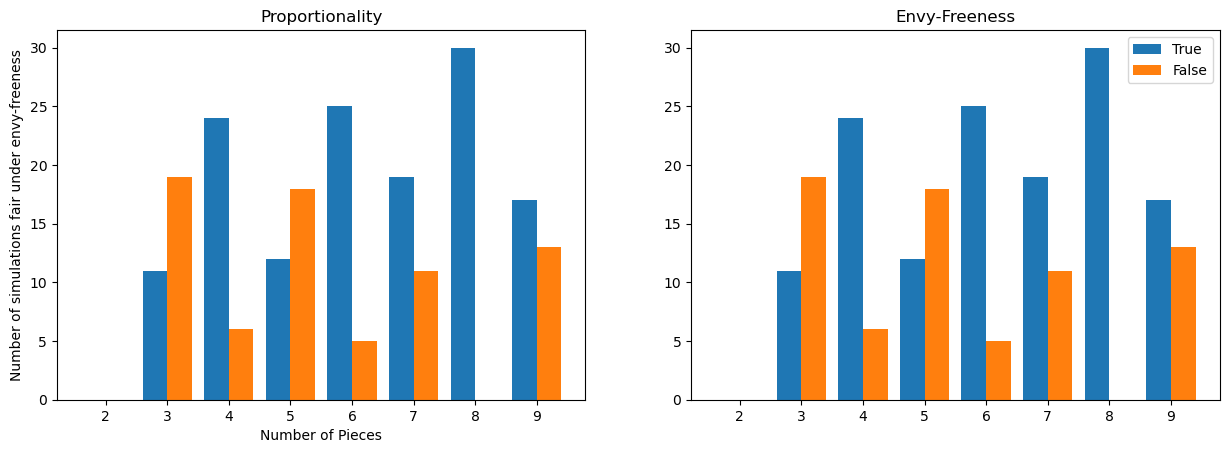

In [278]:
run_simulation(p1_function, p2_function, 10, 30)

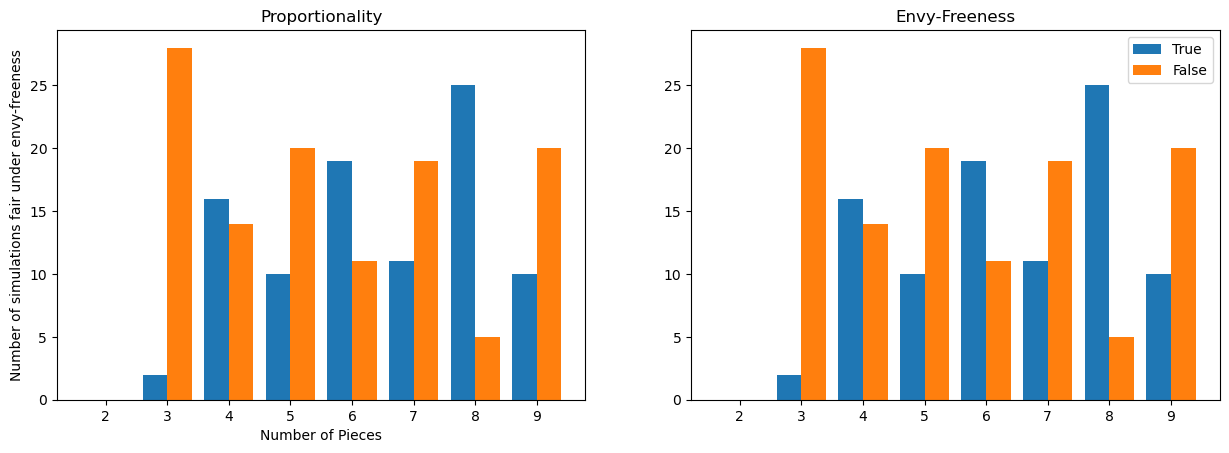

In [279]:
run_simulation(p1_function, p2_function, 10, 30, c=True)

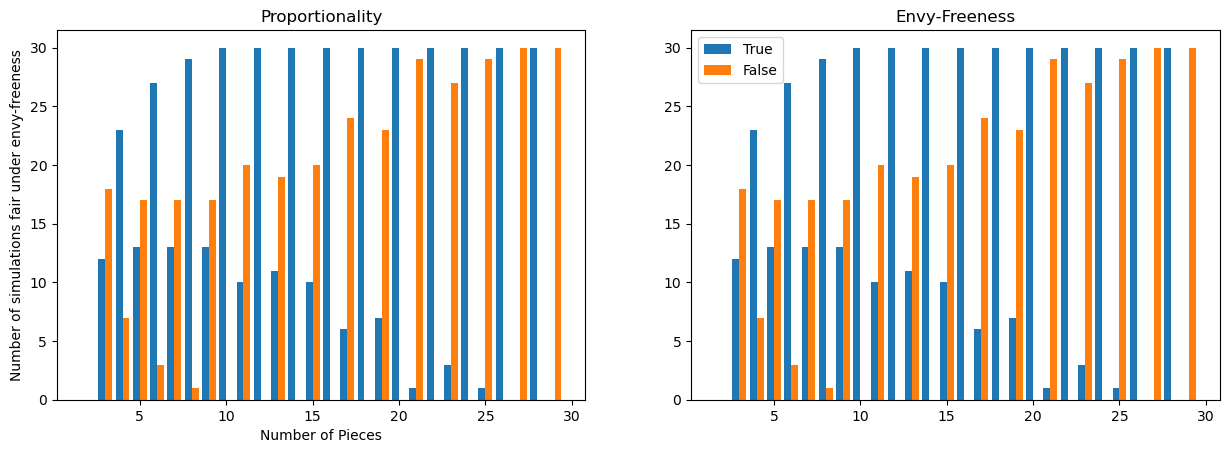

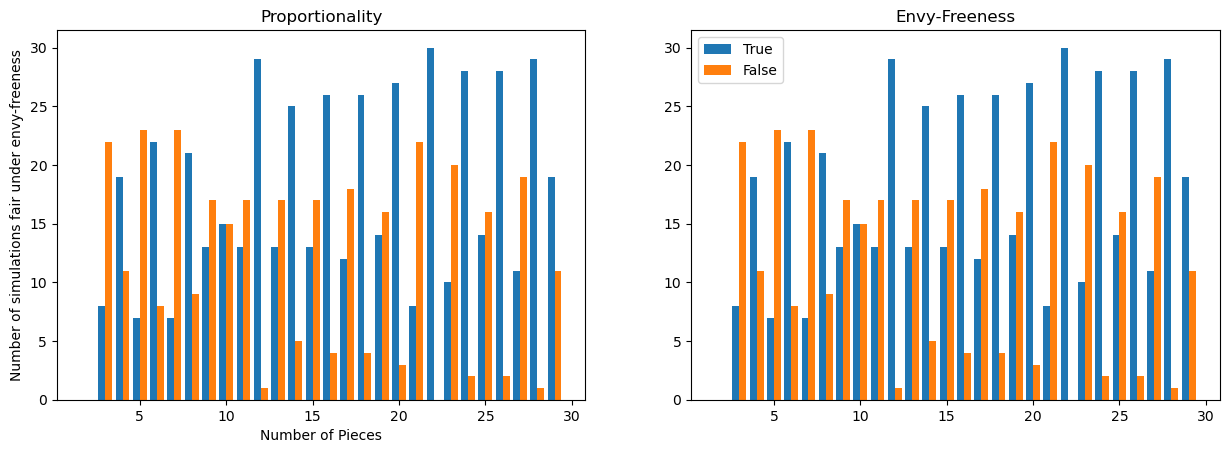

In [280]:
run_simulation(p1_function, p2_function, 30, 30, c=False)
run_simulation(p1_function, p2_function, 30, 30, c=True)

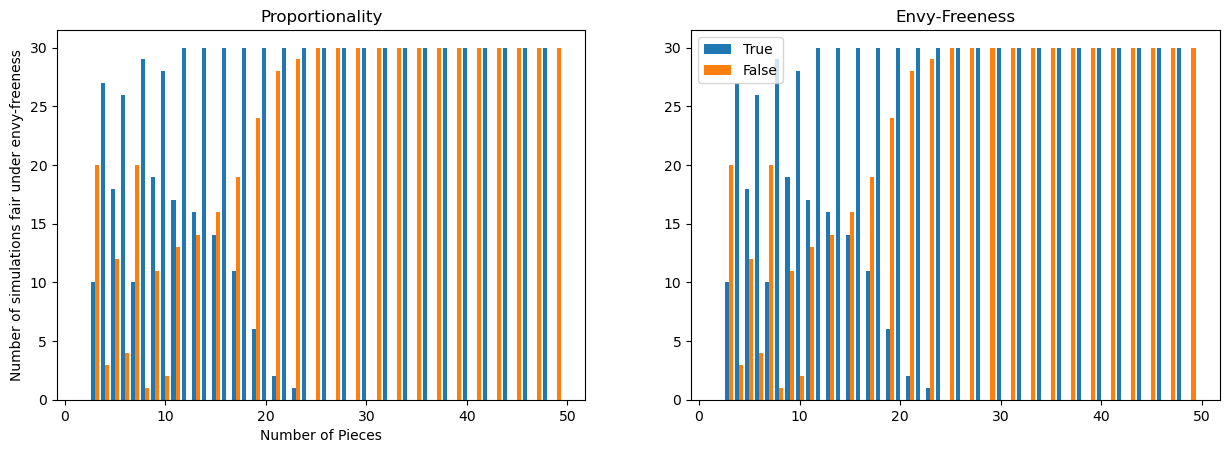

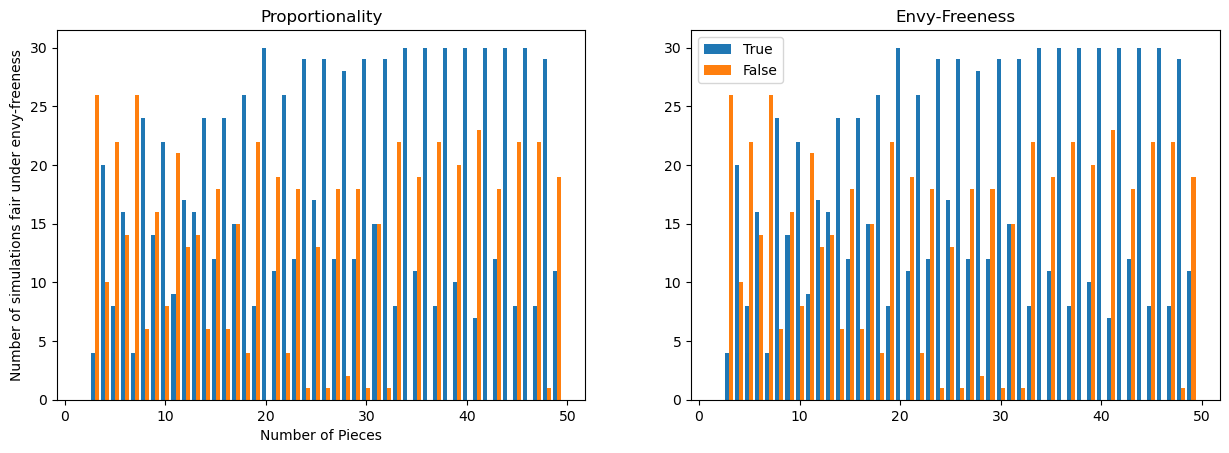

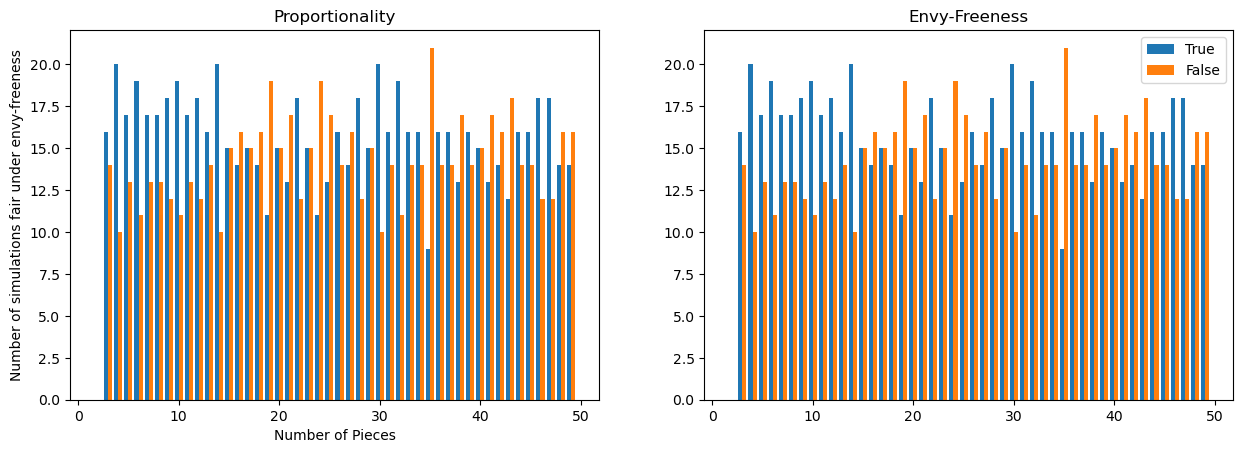

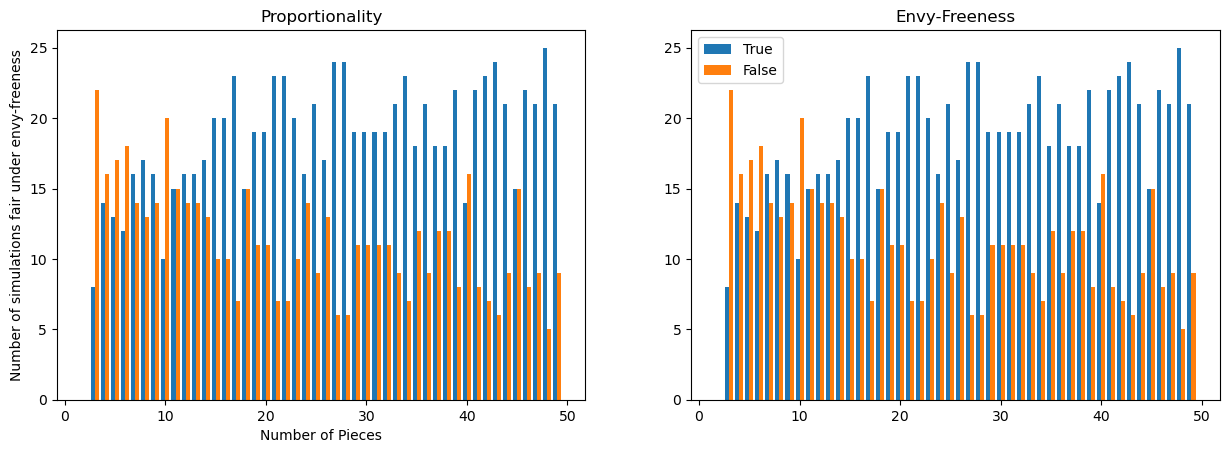

In [281]:
run_simulation(p1_function, p2_function, 50, 30)
run_simulation(p1_function, p2_function, 50, 30, c=True)

p1_function = [9, 1, 2]
p2_function = [6, 4, 5]

run_simulation(p1_function, p2_function, 50, 30)
run_simulation(p1_function, p2_function, 50, 30, c=True)

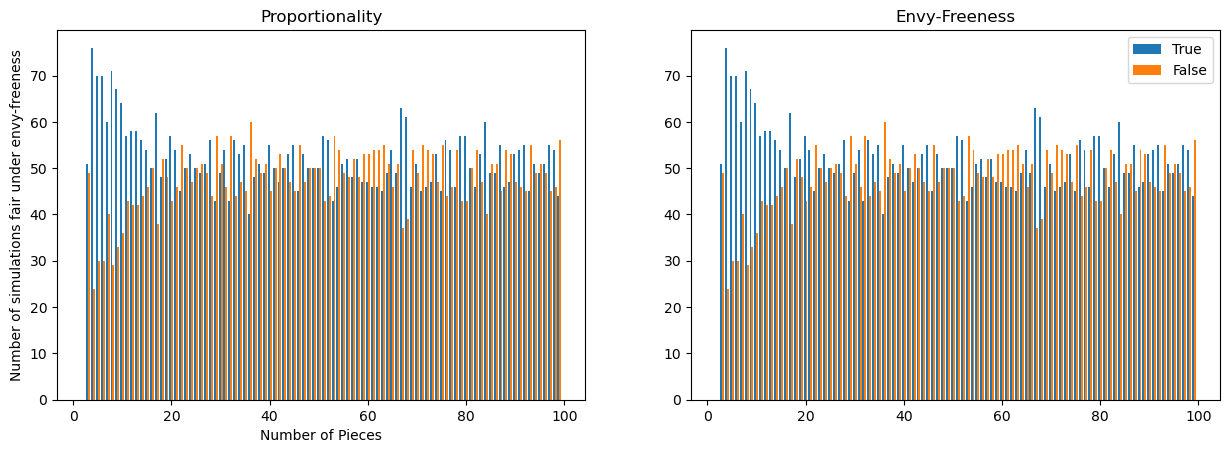

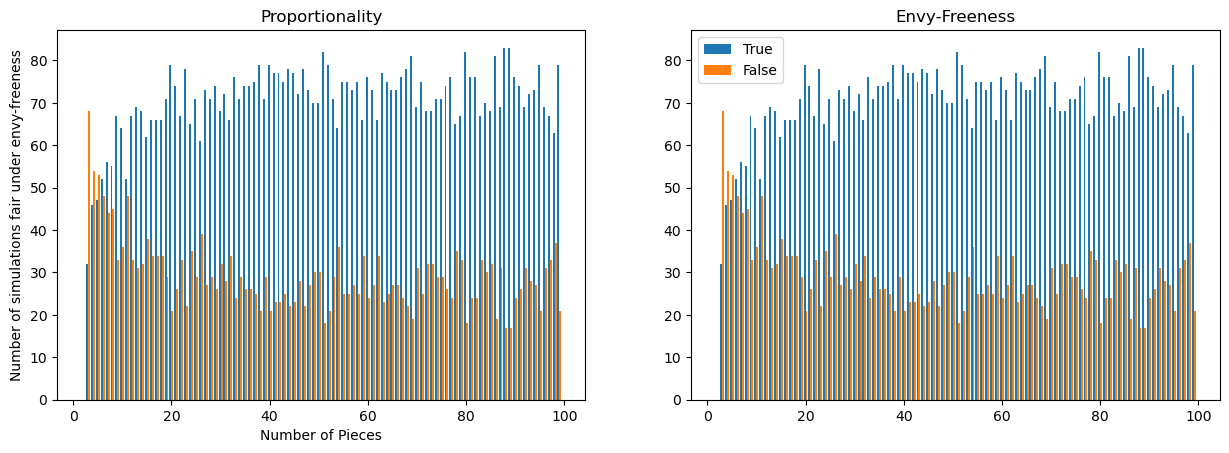

In [282]:
p1_function = [9, 1, 2 ,5]
p2_function = [6, 4, 5, 1]

run_simulation(p1_function, p2_function, 100, 100)
run_simulation(p1_function, p2_function, 100, 100, c=True)

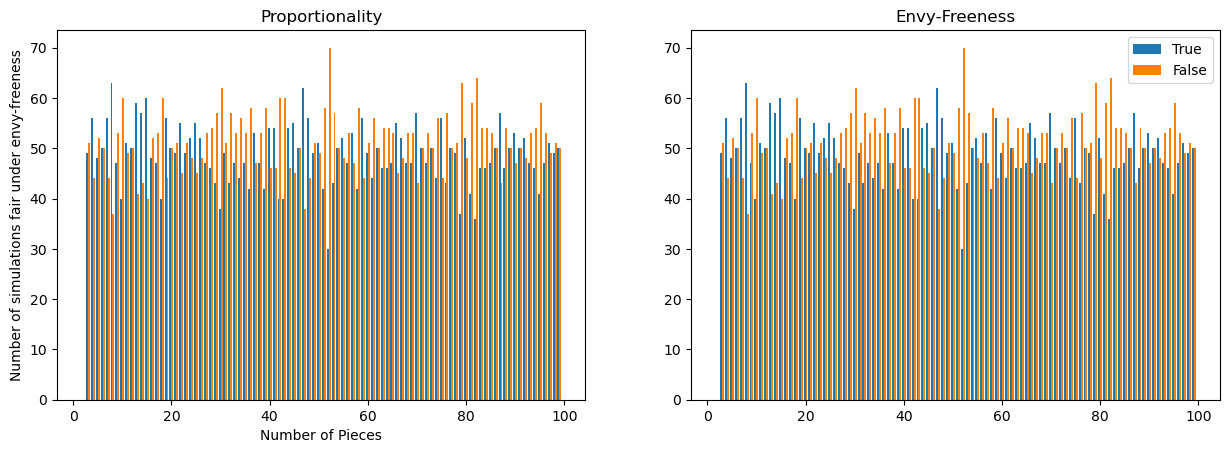

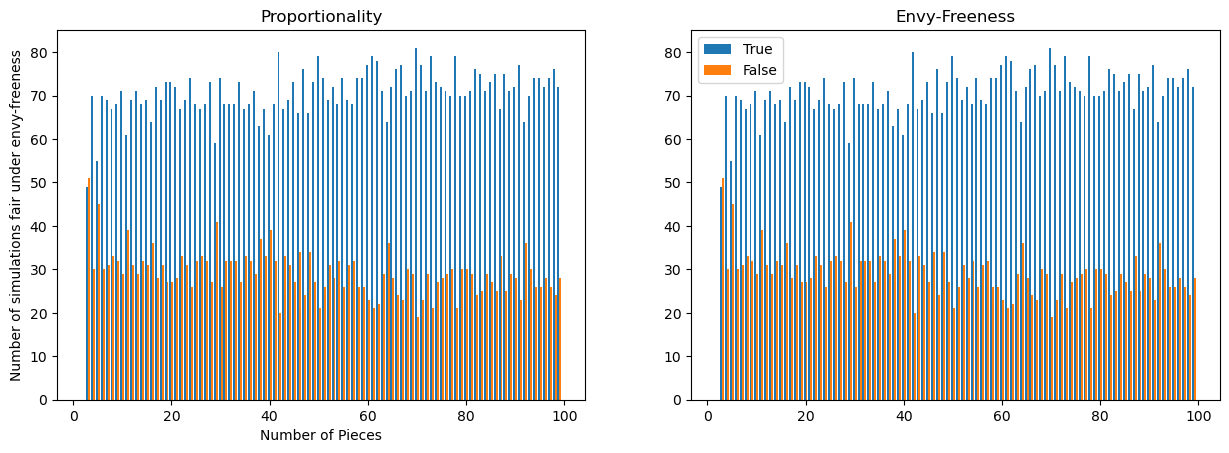

In [283]:
p1_function = [1, 1, 2 ,1]
p2_function = [8, 3, 5, 1]

run_simulation(p1_function, p2_function, 100, 100)
run_simulation(p1_function, p2_function, 100, 100, c=True)

# Analysis and Discussion

Both graphs looking the same for each simulation makes sense given EF implies PR and vise versa when there are only 2 players and the value functions are additive. 

It's interesting to see how the requirement of continuous slices greatly impacts the fairness using EF and PR. It's not something I would have assumed going into this but it makes sense, because it would depend on the values of the cake and if the cutter is able to make it exactly 50/50 for their value function.

Further extensions of this project I'd be interested in expanding further would be expending to include more agents and the possibility of looking at this in a more competitive angle similar to board games like Hanamikoji and New York Slice.


Resources:
https://en.wikipedia.org/wiki/Fair_cake-cutting
https://en.wikipedia.org/wiki/Divide_and_choose
https://boardgamegeek.com/boardgamemechanic/2906/i-cut-you-choose